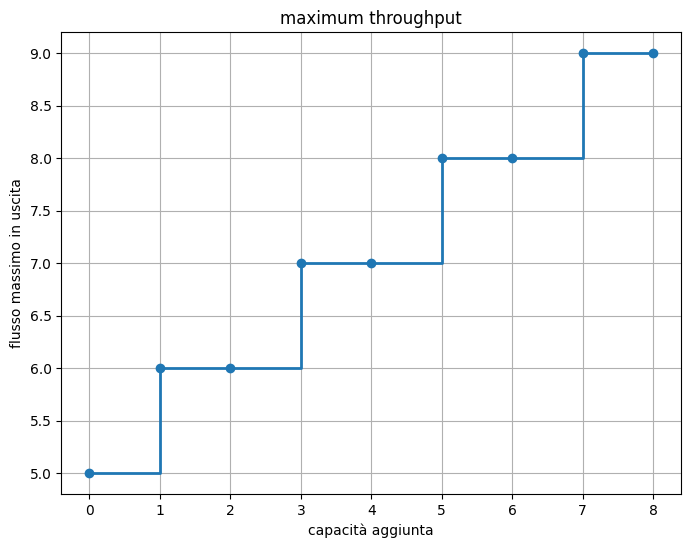

In [1]:
import matplotlib.pyplot as plt

# Valori di x e y per la funzione a tratti
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
y = [5, 6, 6, 7, 7, 8, 8, 9, 9]

# Creazione del grafico a tratti
plt.figure(figsize=(8, 6))
plt.step(x, y, where='post', marker='o', linestyle='-', linewidth=2)
plt.xlabel('capacità aggiunta')
plt.ylabel('flusso massimo in uscita')
plt.title('maximum throughput')
plt.grid(True)
plt.show()

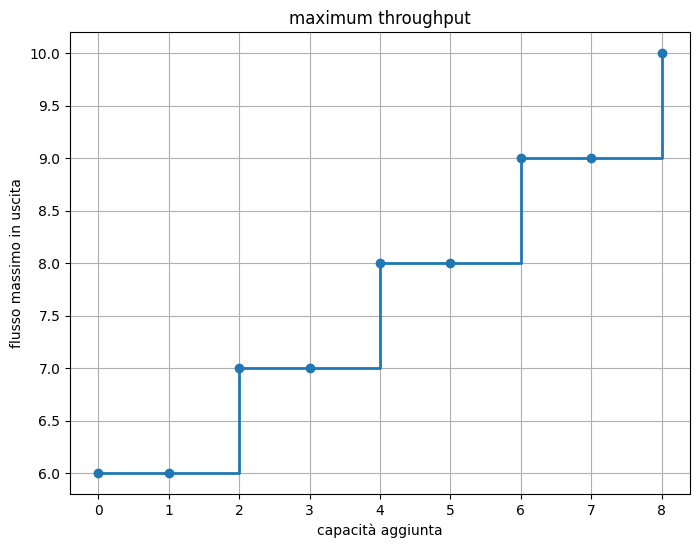

In [2]:
# Valori di x e y per la funzione a tratti
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
y = [6, 6, 7, 7, 8, 8, 9, 9, 10]

# Creazione del grafico a tratti
plt.figure(figsize=(8, 6))
plt.step(x, y, where='post', marker='o', linestyle='-', linewidth=2)
plt.xlabel('capacità aggiunta')
plt.ylabel('flusso massimo in uscita')
plt.title('maximum throughput')
plt.grid(True)
plt.show()

In [3]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    x1, x2, x3, x4 = x
    return x2 * (2 * x2 +2 + 3 * x2) + x1 * (3 * x1 + x1 + 1) + 3 * x3 + x4 * (x4 + 1)

constraints = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 2},  # x1 + x2 = 2
    {'type': 'eq', 'fun': lambda x: x[2] + x[3] - x[0]},  # x3 + x4 = x1
    {'type': 'ineq', 'fun': lambda x: x[0]},
    {'type': 'ineq', 'fun': lambda x: x[1]},
    {'type': 'ineq', 'fun': lambda x: x[2]},
    {'type': 'ineq', 'fun': lambda x: x[3]},
]

x0 = np.array([1, 1, 0.5, 0.5])

result = minimize(objective, x0, constraints=constraints)

if result.success:
    print("Soluzione trovata:")
    print("x1 =", result.x[0])
    print("x2 =", result.x[1])
    print("x3 =", result.x[2])
    print("x4 =", result.x[3])
    print("Valore minimo della funzione obiettivo =", result.fun)
else:
    print("La minimizzazione non è riuscita.")

Soluzione trovata:
x1 = 1.0000000045889585
x2 = 0.9999999954110416
x3 = -6.505213034913027e-19
x4 = 1.0000000045889585
Valore minimo della funzione obiettivo = 14.0


In [4]:
def objective(x):
    x1, x2 = x
    return x2 * (2 * x2 +2 + 3 * x2) + x1 * (5 * x1 + 2) 

constraints = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 2},  # x1 + x2 = 2  
    {'type': 'ineq', 'fun': lambda x: x[0]},
    {'type': 'ineq', 'fun': lambda x: x[1]}
   
]

x0 = np.array([1, 1])

result = minimize(objective, x0, constraints=constraints)

if result.success:
    print("Soluzione trovata:")
    print("x1 =", result.x[0])
    print("x2 =", result.x[1])
    print("Valore minimo della funzione obiettivo =", result.fun)
else:
    print("La minimizzazione non è riuscita.")

Soluzione trovata:
x1 = 1.0
x2 = 1.0
Valore minimo della funzione obiettivo = 14.0


In [7]:

# Definizione della funzione obiettivo
def objective(f):
    f1, f2, f3, f4 = f
    return (f1 + f2 + f4) * (3 * (f1 + f2 + f4)) + f3 * (2 * f3 + 2) + f4**2 + 3 * f2 + \
           f1 * (f1 + 1) + (f1 + f2) * (1 + (f1 + f2)) + (f3 + f4) * 3 * (f3 + f4)

# Vincolo di uguaglianza: f1 + f2 + f3 + f4 = 2
def constraint_eq(f):
    return f[0] + f[1] + f[2] + f[3] - 2

# Vincoli di non-negatività
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Vincoli
constraints = {'type': 'eq', 'fun': constraint_eq}

# Valori iniziali
initial_guess = [0.5, 0.5, 0.5, 0.5]

# Risoluzione del problema
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Output dei risultati
if result.success:
    print("Valori ottimali di f1, f2, f3, f4:", result.x)
    print("Valore minimo della funzione obiettivo:", result.fun)
else:
    print("Ottimizzazione fallita:", result.message)

Valori ottimali di f1, f2, f3, f4: [9.99996132e-01 4.06575815e-20 1.00000387e+00 0.00000000e+00]
Valore minimo della funzione obiettivo: 14.000000000149582


In [8]:
# Definizione della funzione obiettivo
def objective(f):
    f1, f2, f3, f4, f5, f6, f7 = f
    return f1*3*f1+f2*(f2+1)+f3*3+f4*(f4+1)+f5*(2*f5+2)+f6*(3*f6)+f7*(f7)

# Definizione dei vincoli di uguaglianza
def constraint1(f):
    return f[0] + f[4] - 2  # f1 + f5 = 2

def constraint2(f):
    return f[5] - (f[4] + f[6])  # f6 = f5 + f7

def constraint3(f):
    return f[3] - (f[2] + f[1])  # f4 = f3 + f2

def constraint4(f):
    return f[0] - (f[1] + f[2] + f[6])  # f1 = f2 + f3 + f7

# Creazione dei vincoli per l'ottimizzazione
constraints = [
    {'type': 'eq', 'fun': constraint1},
    {'type': 'eq', 'fun': constraint2},
    {'type': 'eq', 'fun': constraint3},
    {'type': 'eq', 'fun': constraint4}
]

# Vincoli di non negatività per f1, f2, f3, f4, f5, f6, f7
bounds = [(0, None)] * 7

# Valori iniziali
initial_guess = [0.5] * 7

# Risoluzione del problema
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Output dei risultati
if result.success:
    print("Valori ottimali di f1, f2, f3, f4, f5, f6, f7:", result.x)
    print("Valore minimo della funzione obiettivo:", result.fun)
else:
    print("Ottimizzazione fallita:", result.message)

Valori ottimali di f1, f2, f3, f4, f5, f6, f7: [1.00000000e+00 9.99999949e-01 4.06933581e-08 9.99999990e-01
 9.99999998e-01 1.00000001e+00 1.22137469e-08]
Valore minimo della funzione obiettivo: 14.000000000000002


In [9]:
def objective(f,a):
    f1, f2, f3 = f
    return f1*3*f1+f1*(f1+1)+f1*(f1+1)+f2*3*f2+f2*(f2+1)+f2*(a*f2+1)+f3*(5*f3+2)

def objective_with_a_lambda(x):
    f1, f2, f3, a = x
    return objective([f1, f2, f3], a)

# Vincolo sul parametro lambda (lambda > 0)
def constraint_lambda(x, lambda_val):
    return x[0] + x[1] + x[2] - lambda_val

# Condizioni iniziali per f1, f2, f3, e a
initial_guess = [1, 1, 1, 0]  # a parte da 0

# Limiti su a e lambda (lambda > 0, a >= 0)
bounds = [(None, None), (None, None), (None, None), (0, None)]

# Vincolo per il parametro lambda, modificabile ma con lambda > 0
lambda_val = 1  # Imposta un valore di partenza positivo per lambda
constraints = {'type': 'eq', 'fun': constraint_lambda, 'args': (lambda_val,)}

# Risoluzione della minimizzazione
result = minimize(objective_with_a_lambda, initial_guess, bounds=bounds, constraints=constraints)

# Risultati
f_opt = result.x[:3]  # Valori ottimali di f1, f2, f3
a_opt = result.x[3]    # Valore ottimale di a
fun_min = result.fun   # Valore minimo della funzione obiettivo

print("Valori ottimali di f:", f_opt)
print("Valore ottimale di a:", a_opt)
print("Valore minimo della funzione obiettivo:", fun_min)



Valori ottimali di f: [0.30769231 0.38461539 0.30769231]
Valore ottimale di a: 4.431387770350522e-16
Valore minimo della funzione obiettivo: 3.5384615384615388
